## AdaRank Evaluation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

These scores are obtained from the run of AdaRank on Fold5 with -noeq flag and -max number of consecutively sampled features set to 1. The analysis investigated why the scores have negative values and ranks them.

In [330]:
from collections import defaultdict

test_data = defaultdict()
test_data_q_rel = defaultdict()

# Import test data for all 5 folds and extract query id and relevance label
for i in range(1,6):
    test_data[i] = pd.read_csv('/Users/ralucageorgescu/Documents/MSLR-WEB10K/Fold%d/test.txt'%i, sep=" ", header = None)
    test_data[i][1] = test_data[i][1].map(lambda x:x.lstrip('qid:'))
    test_data_q_rel[i] = pd.concat([test_data[i][1], test_data[i][0]], axis=1, keys=['qid', 'relevance_label'])

In [312]:
# Test data for fold 3, first 10 entries
test_data_q_rel[3][:3]

,qid,relevance_label
0,4,0
1,4,0
2,4,0


## Scores Optimised for MAP

In [331]:
data_fold1_map = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold1_map.txt', names= ['qid','docid','score'])
data_fold1_map['relevance_label'] = test_data[1][0]
data_fold1_map[:3]

,qid,docid,score,relevance_label
0,13,0,29.154465,2
1,13,1,14.743775,1
2,13,2,21.450430,3


In [346]:
data_fold2_map = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold2_map.txt', names= ['qid','docid','score'])
data_fold2_map['relevance_label'] = test_data[2][0]

In [350]:
data_fold3_map = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold3_map.txt', names= ['qid','docid','score'])
data_fold3_map['relevance_label'] = test_data[3][0]

In [355]:
data_fold4_map = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold4_map.txt', names= ['qid','docid','score'])
data_fold4_map['relevance_label'] = test_data[4][0]

In [364]:
data_fold5_map = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold5_map.txt', names= ['qid','docid','score'])
data_fold5_map['relevance_label'] = test_data[5][0]

## Scores Optimised for NDCG@10

In [336]:
data_fold1 = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold1.txt', names= ['qid','docid','score'])
data_fold1['relevance_label'] = test_data[1][0]

In [318]:
data_fold2 = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold2.txt', names= ['qid','docid','score'])
data_fold2['relevance_label'] = test_data[2][0]
data_fold2[:3]

,qid,docid,score,relevance_label
0,1,0,-38.615415,2
1,1,1,-20.385842,2
2,1,2,-34.731544,0


In [309]:
data_fold3 = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold3.txt', names= ['qid','docid','score'])
data_fold3['relevance_label'] = test_data[3][0]
data_fold3[:3]

,qid,docid,score,relevance_label
0,4,0,-71.409824,0
1,4,1,-47.542529,0
2,4,2,-71.497357,0


In [310]:
data_fold4 = pd.read_table('/Users/ralucageorgescu/Documents/scores_fold4.txt', names= ['qid','docid','score'])
data_fold4['relevance_label'] = test_data[4][0]
data_fold4[:3]

,qid,docid,score,relevance_label
0,7,0,-125.571233,0
1,7,1,-138.728298,0
2,7,2,-138.014523,1


In [311]:
data_fold5 = pd.read_table('/Users/ralucageorgescu/Documents/scores.txt')
data_fold5['relevance_label'] = test_data[5][0]
data_fold5[:3]

,qid,docid,score,relevance_label
0,10,0,-5.294102,0
1,10,1,0.777860,0
2,10,2,2.404690,1


## Stats on test set

Number of queries that have at most 10 documents associated

In [101]:
number = 0
for count in doc_counts_per_query:
    if count <= 10:
        number += 1
print(number)

39


Number of queries in the test set

In [99]:
groupby_query = qs.groupby('qid')
groups = groupby_query.groups
len(groups)

2000

In [21]:
len(data)

235259

In [95]:
docs_per_query = data.groupby('qid').docid.count()
docs_per_query[:10]

qid
10      93
25      58
40      84
55      58
70     163
85     117
100     88
115    138
130     84
145     97
Name: docid, dtype: int64

## Sort rankings by query id

Order scores
- group by qid
- sort by score in descresing order

### MAP

In [365]:
qs_fold1_map = pd.concat([data_fold1_map['qid'], data_fold1_map['score'], data_fold1_map['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])
qs_fold2_map = pd.concat([data_fold2_map['qid'], data_fold2_map['score'], data_fold2_map['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])
qs_fold3_map = pd.concat([data_fold3_map['qid'], data_fold3_map['score'], data_fold3_map['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])
qs_fold4_map = pd.concat([data_fold4_map['qid'], data_fold4_map['score'], data_fold4_map['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])
qs_fold5_map = pd.concat([data_fold5_map['qid'], data_fold5_map['score'], data_fold5_map['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])

In [344]:
rank_by_qid_fold1_map = qs_fold1_map.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold1_map['position'] = rank_by_qid_fold1_map.groupby('qid').cumcount()

In [348]:
rank_by_qid_fold2_map = qs_fold2_map.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold2_map['position'] = rank_by_qid_fold2_map.groupby('qid').cumcount()

In [352]:
rank_by_qid_fold3_map = qs_fold3_map.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold3_map['position'] = rank_by_qid_fold3_map.groupby('qid').cumcount()

In [358]:
rank_by_qid_fold4_map = qs_fold4_map.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold4_map['position'] = rank_by_qid_fold4_map.groupby('qid').cumcount()

In [366]:
rank_by_qid_fold5_map = qs_fold5_map.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold5_map['position'] = rank_by_qid_fold5_map.groupby('qid').cumcount()

### NDCG@10

In [337]:
qs_fold1 = pd.concat([data_fold1['qid'], data_fold1['score'], data_fold1['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])

In [319]:
qs_fold2 = pd.concat([data_fold2['qid'], data_fold2['score'], data_fold2['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])

In [320]:
qs_fold3 = pd.concat([data_fold3['qid'], data_fold3['score'], data_fold3['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])

In [274]:
qs_fold4 = pd.concat([data_fold4['qid'], data_fold4['score'], data_fold4['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])

In [166]:
qs_fold5 = pd.concat([data_fold5['qid'], data_fold5['score'], data_fold5['relevance_label']], axis=1, keys=['qid','score', 'relevance_label'])

In [338]:
rank_by_qid_fold1 = qs_fold1.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold1['position'] = rank_by_qid_fold1.groupby('qid').cumcount()
rank_by_qid_fold1[:5]

qid        score  relevance_label  position
qid                                                 
13  107   13  1563.983701                0         0
    132   13   812.044667                2         1
    89    13   124.161822                2         2
    32    13    94.361635                0         3
    121   13    64.241272                0         4

In [321]:
rank_by_qid_fold2 = qs_fold2.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold2['position'] = rank_by_qid_fold2.groupby('qid').cumcount()
rank_by_qid_fold2[:5]

qid       score  relevance_label  position
qid                                               
1   17    1  232.775576                2         0
    46    1  168.643329                3         1
    80    1  129.833561                0         2
    83    1    1.454070                1         3
    20    1   -8.604613                2         4

In [314]:
rank_by_qid_fold3 = qs_fold3.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold3['position'] = rank_by_qid_fold3.groupby('qid').cumcount()
rank_by_qid_fold3[:5]

qid      score  relevance_label  position
qid                                               
4   97     4  71.717630                0         0
    64     4  15.696029                0         1
    94     4  -0.596635                0         2
    89     4  -2.533713                0         3
    100    4 -23.409743                2         4

In [282]:
rank_by_qid_fold4 = qs_fold4.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold4['position'] = rank_by_qid_fold4.groupby('qid').cumcount()
rank_by_qid_fold4[:5]

qid          score  relevance_label  position
qid                                                  
7   87    7  139377.635340                0         0
    98    7     134.158005                0         1
    14    7     120.460336                0         2
    12    7     119.976465                0         3
    3     7     -87.093182                1         4

In [275]:
rank_by_qid_fold5 = qs_fold5.groupby('qid').apply(lambda x: x.sort_values(['score'],ascending = False))
rank_by_qid_fold5['position'] = rank_by_qid_fold5.groupby('qid').cumcount()
rank_by_qid_fold5[:5]

qid        score  relevance_label  position
qid                                                
10  73   10  4498.565910                4         0
    5    10  4367.257274                2         1
    61   10    35.755612                1         2
    59   10    12.754565                3         3
    77   10     3.772885                0         4

### Documents per query Distribution

Example for fold 5 of document count per query

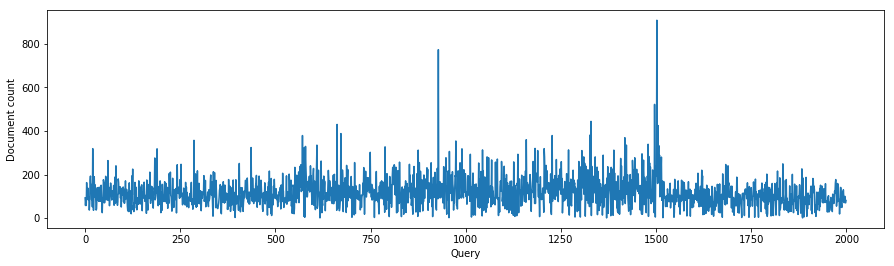

In [191]:
counts = qs_fold5.groupby('qid')['score'].count().as_matrix()

plt.plot(counts)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Query')
plt.ylabel('Document count')
plt.show()

# Evaluation Metrics

## MAP

In [323]:
def get_MAP(fold):
    MAP = pd.concat([fold['qid'], fold['relevance_label'], fold['score'], fold['position']], axis=1)
    MAP['relevance_binary'] = np.where(MAP['relevance_label'] >= 1,1,0)
    MAP['relevance_cumulative'] = MAP.groupby('qid')['relevance_label'].cumsum()
    MAP['precision'] = (MAP['relevance_cumulative']*MAP['relevance_binary'])/(MAP['position']+1)
    return MAP

def mean_average_precision(data):
    precision_sum = data.groupby('qid')['precision'].sum()
    relevant_docs = data.groupby('qid')['relevance_binary'].sum()
    average_precision = precision_sum/relevant_docs
    mean_average_precision = average_precision.sum()/len(average_precision)
    return mean_average_precision

0.82672136753797187

In [339]:
print("Fold 1: " + str(mean_average_precision(get_MAP(rank_by_qid_fold1))))
print("Fold 2: " + str(mean_average_precision(get_MAP(rank_by_qid_fold2))))
print("Fold 3: " + str(mean_average_precision(get_MAP(rank_by_qid_fold3))))
print("Fold 4: " + str(mean_average_precision(get_MAP(rank_by_qid_fold4))))
print("Fold 5: " + str(mean_average_precision(get_MAP(rank_by_qid_fold5))))
print("Mean MAP: " + str((mean_average_precision(get_MAP(rank_by_qid_fold1))+
                        mean_average_precision(get_MAP(rank_by_qid_fold2)) +
                        mean_average_precision(get_MAP(rank_by_qid_fold3)) +
                        mean_average_precision(get_MAP(rank_by_qid_fold4)) +
                        mean_average_precision(get_MAP(rank_by_qid_fold5)))/5))

Fold 1: 0.846535994864
Fold 2: 0.826721367538
Fold 3: 0.8247968849
Fold 4: 0.833916077798
Fold 5: 0.904467005669
Mean MAP: 0.847287466154


Loss function optimised for MAP:

In [367]:
print("Fold 1: " + str(mean_average_precision(get_MAP(rank_by_qid_fold1_map))))
print("Fold 2: " + str(mean_average_precision(get_MAP(rank_by_qid_fold2_map))))
print("Fold 3: " + str(mean_average_precision(get_MAP(rank_by_qid_fold3_map))))
print("Fold 4: " + str(mean_average_precision(get_MAP(rank_by_qid_fold4_map))))
print("Fold 5: " + str(mean_average_precision(get_MAP(rank_by_qid_fold5_map))))
print("Mean MAP: " + str((mean_average_precision(get_MAP(rank_by_qid_fold1_map))+
                        mean_average_precision(get_MAP(rank_by_qid_fold2_map)) +
                        mean_average_precision(get_MAP(rank_by_qid_fold3_map)) +
                        mean_average_precision(get_MAP(rank_by_qid_fold4_map)) +
                        mean_average_precision(get_MAP(rank_by_qid_fold5_map)))/5))

Fold 1: 0.848903728369
Fold 2: 0.829390298075
Fold 3: 0.838357924986
Fold 4: 0.887760239239
Fold 5: 0.818426756143
Mean MAP: 0.844567789362


Precision distribution for qid:10 in fold 5

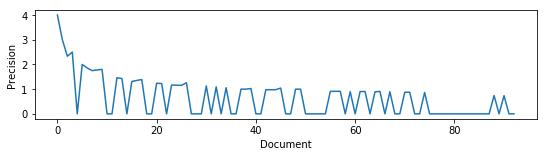

In [231]:
precision = MAP['precision'][:93].as_matrix()

plt.plot(precision)
fig_size3 = plt.rcParams["figure.figsize"]
fig_size3[0] = 10
fig_size3[1] = 4
plt.rcParams["figure.figsize"] = fig_size3
plt.xlabel('Document')
plt.ylabel('Precision')
plt.show()

Relevance distribution for qid:10 in fold 5

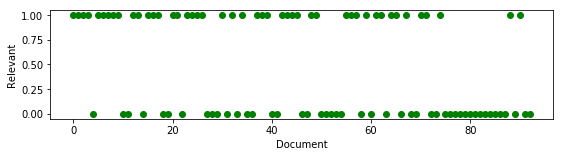

In [230]:
relevance = MAP['relevance_binary'][:93].as_matrix()

plt.plot(relevance,'go')
fig_size2 = plt.rcParams["figure.figsize"]
fig_size2[0] = 9
fig_size2[1] = 2
plt.rcParams["figure.figsize"] = fig_size2
plt.xlabel('Document')
plt.ylabel('Relevant')
plt.show()

## NDCG@10

In [303]:
def get_DCG(fold):
    NDCG = pd.concat([fold['qid'], fold['relevance_label'], fold['position']], axis=1)
    NDCG = NDCG.groupby('qid').head(10)

    NDCG['gain'] = (2**NDCG['relevance_label'])-1
    NDCG['rank+1'] = NDCG['position']+2
    NDCG['discount'] = np.log2(NDCG['rank+1'])
    NDCG['discounted_gain'] = NDCG['gain']/NDCG['discount']

    DCG = NDCG.groupby('qid')['discounted_gain'].sum()
    
    NDCG_ideal = pd.concat([fold['qid'], fold['relevance_label']], axis=1, keys=['qid', 'relevance_label'])
    NDCG_ideal = NDCG_ideal.groupby('qid')['relevance_label'].apply(lambda x: x.sort_values(ascending=False)).reset_index()
    NDCG_ideal['position'] = NDCG_ideal.groupby('qid').cumcount()+1
    NDCG_ideal = NDCG_ideal.groupby('qid').head(10)
    
    NDCG_ideal['gain'] = (2**NDCG_ideal['relevance_label'])-1
    NDCG_ideal['rank+1'] = NDCG_ideal['position']+1
    NDCG_ideal['discount'] = np.log2(NDCG_ideal['rank+1'])
    NDCG_ideal['discounted_gain'] = NDCG_ideal['gain']/NDCG_ideal['discount']

    optDCG = NDCG_ideal.groupby('qid')['discounted_gain'].sum()

    return (DCG, optDCG)

In [306]:
def avg_NDCG(DCG, optDCG):
    normalised_DCG = DCG/optDCG
    normalised_DCG = np.nan_to_num(normalised_DCG)
    avg_NDCG = sum(normalised_DCG)/len(normalised_DCG)
    return avg_NDCG

In [340]:
print('Fold1: ' + str(avg_NDCG(get_DCG(rank_by_qid_fold1)[0],get_DCG(rank_by_qid_fold1)[1])))
print('Fold2: ' + str(avg_NDCG(get_DCG(rank_by_qid_fold2)[0],get_DCG(rank_by_qid_fold2)[1])))
print('Fold3: ' + str(avg_NDCG(get_DCG(rank_by_qid_fold3)[0],get_DCG(rank_by_qid_fold3)[1])))
print('Fold4: ' + str(avg_NDCG(get_DCG(rank_by_qid_fold4)[0],get_DCG(rank_by_qid_fold4)[1])))
print('Fold5: ' + str(avg_NDCG(get_DCG(rank_by_qid_fold5)[0],get_DCG(rank_by_qid_fold5)[1])))

print("Mean NDCG@10: " + str((avg_NDCG(get_DCG(rank_by_qid_fold1)[0],get_DCG(rank_by_qid_fold1)[1])+
                        avg_NDCG(get_DCG(rank_by_qid_fold2)[0],get_DCG(rank_by_qid_fold2)[1]) +
                        avg_NDCG(get_DCG(rank_by_qid_fold3)[0],get_DCG(rank_by_qid_fold3)[1]) +
                        avg_NDCG(get_DCG(rank_by_qid_fold4)[0],get_DCG(rank_by_qid_fold4)[1]) +
                        avg_NDCG(get_DCG(rank_by_qid_fold5)[0],get_DCG(rank_by_qid_fold5)[1]))/5))

Fold1: 0.334924847356
Fold2: 0.329356966302
Fold3: 0.327640082738
Fold4: 0.333235162912
Fold5: 0.405948667983
Mean NDCG@10: 0.346221145458


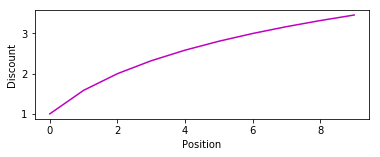

In [265]:
discount = NDCG['discount'][:10].as_matrix()

plt.plot(discount, color='m')
fig_size5 = plt.rcParams["figure.figsize"]
fig_size5[0] = 6
fig_size5[1] = 2
plt.rcParams["figure.figsize"] = fig_size5
plt.xlabel('Position')
plt.ylabel('Discount')
plt.show()

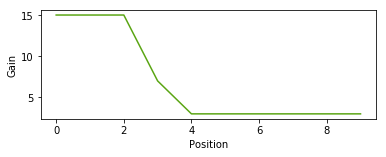

In [264]:
gain = NDCG_ideal['gain'][:10].as_matrix()

plt.plot(gain, color='#5aa513')
fig_size5 = plt.rcParams["figure.figsize"]
fig_size5[0] = 6
fig_size5[1] = 2
plt.rcParams["figure.figsize"] = fig_size5
plt.xlabel('Position')
plt.ylabel('Gain')
plt.show()

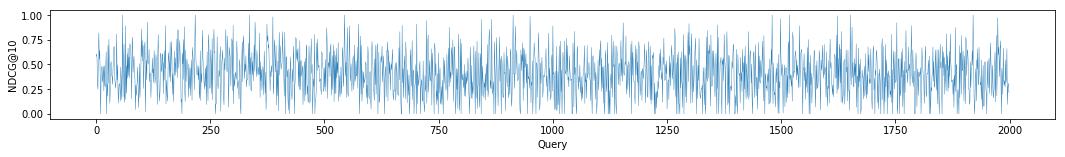

In [245]:
plt.plot(normalised_DCG, linewidth=.4)
fig_size4 = plt.rcParams["figure.figsize"]
fig_size4[0] = 18
fig_size4[1] = 2
plt.rcParams["figure.figsize"] = fig_size4
plt.xlabel('Query')
plt.ylabel('NDCG@10')
plt.show()